In [31]:
import clean_df
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import re
import warnings
import importlib
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [73]:
importlib.reload(clean_df)

<module 'clean_df' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\Telecomm_data_analysis\\clean_df.py'>

In [2]:
#Find the outliers

def outlier_bound(df):
    bounds={}
    for col in cols_numeric:
        q1=df[col].quantile(0.05)  #0.05
        q3=df[col].quantile(0.95)   #0.95
        lower_b=q1-(1.5*(q3-q1))
        upper_b=q3+(1.5*(q3-q1))
        bounds[col]=[lower_b,upper_b]
    return bounds

In [3]:
#Replace the outliers with mean value This helps with the computational analysis.
def outlier_remove(df):
    bounds=outlier_bound(df)
    for col in cols_numeric:
        mean_use=df[col][(df[col] > bounds[col][0]) & (df[col] < bounds[col][1])].mean()
        df[col].where((df[col]>bounds[col][0])&(df[col]<bounds[col][1]),mean_use,inplace=True)
    return df

In [5]:
df_original = pd.read_excel('Week1_challenge_data_source.xlsx',
                            dtype={'Bearer Id': str, 'IMSI': str,'MSISDN/Number': str, 'IMEI': str,
                                  'Handset Manufacturer':str,'Handset Type':str}, engine='openpyxl')

In [162]:
df=df_original.copy(deep=True)

In [163]:
cleaning_df=clean_df.CleanDataframe(df)

In [164]:
print(df.shape)
df.head()

(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117,33664962239,35521209507511,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [165]:
df.describe()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,45.000000,5.000000,63.000000,63.000000,5.687300e+05,2.094950e+04,100.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,70.000000,15.000000,19710.750000,1120.000000,3.768308e+06,8.402025e+04,100.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


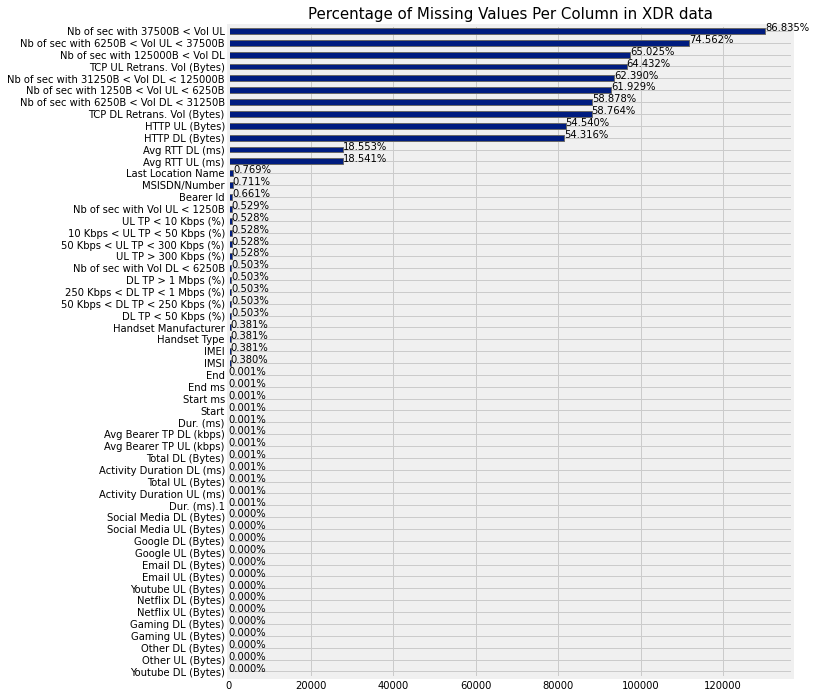

In [166]:
cleaning_df.check_missing_values()

In [167]:
bytes_data = ['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                'Email DL (Bytes)', 'Email UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)',
              'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
              'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

In [168]:
# !! Run it once
df=cleaning_df.convert_bytes_to_megabytes(bytes_data)

**Remove columns with >25% Missing values and irrelevant columns**

In [169]:
df=cleaning_df.drop_unwanted_columns()

In [170]:
df.dropna(how='all',subset=['IMEI','IMSI','MSISDN/Number'],inplace=True)

In [171]:
df.shape

(149431, 44)

In [172]:
df.isna().sum()

Bearer Id                           430
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                       496
IMEI                                  2
Last Location Name                  592
Avg RTT DL (ms)                   27693
Avg RTT UL (ms)                   27675
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 724
50 Kbps < DL TP < 250 Kbps (%)      724
250 Kbps < DL TP < 1 Mbps (%)       724
DL TP > 1 Mbps (%)                  724
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Handset Manufacturer                  2


In [173]:
df.dtypes

Bearer Id                                 object
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                      object
MSISDN/Number                             object
IMEI                                      object
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 30

In [174]:
# separating columns based on datatypes
cols_numeric=df.columns.difference(['Bearer Id','Start','End','IMSI','MSISDN/Number','IMEI','Last Location Name',
                                    'Handset Manufacturer','Handset Type']).to_list()
cols_cat=['Handset Manufacturer','Handset Type']

**Check the skewness before ploting histogram (No need to plot Normally Distributed variables)**

In [175]:
print('Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted ad <-1 skewed to negative')
df.skew(axis=0,numeric_only=True)

Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted ad <-1 skewed to negative


Start ms                           0.001031
End ms                            -0.000927
Dur. (ms)                          3.958580
Avg RTT DL (ms)                   64.581111
Avg RTT UL (ms)                   28.432649
Avg Bearer TP DL (kbps)            2.588274
Avg Bearer TP UL (kbps)            4.501155
DL TP < 50 Kbps (%)               -2.297738
50 Kbps < DL TP < 250 Kbps (%)     3.270171
250 Kbps < DL TP < 1 Mbps (%)      4.570901
DL TP > 1 Mbps (%)                 5.365732
UL TP < 10 Kbps (%)               -8.987634
10 Kbps < UL TP < 50 Kbps (%)     10.948481
50 Kbps < UL TP < 300 Kbps (%)    21.861613
UL TP > 300 Kbps (%)              36.166957
Activity Duration DL (ms)          5.865786
Activity Duration UL (ms)          7.375312
Nb of sec with Vol DL < 6250B      9.034900
Nb of sec with Vol UL < 1250B      7.491427
Social Media DL (Bytes)           -0.001955
Social Media UL (Bytes)           -0.000098
Google DL (Bytes)                 -0.008221
Google UL (Bytes)               

In [176]:
cols_hist=set(cols_numeric)-set(bytes_data)-set(['Start ms', 'End ms'])

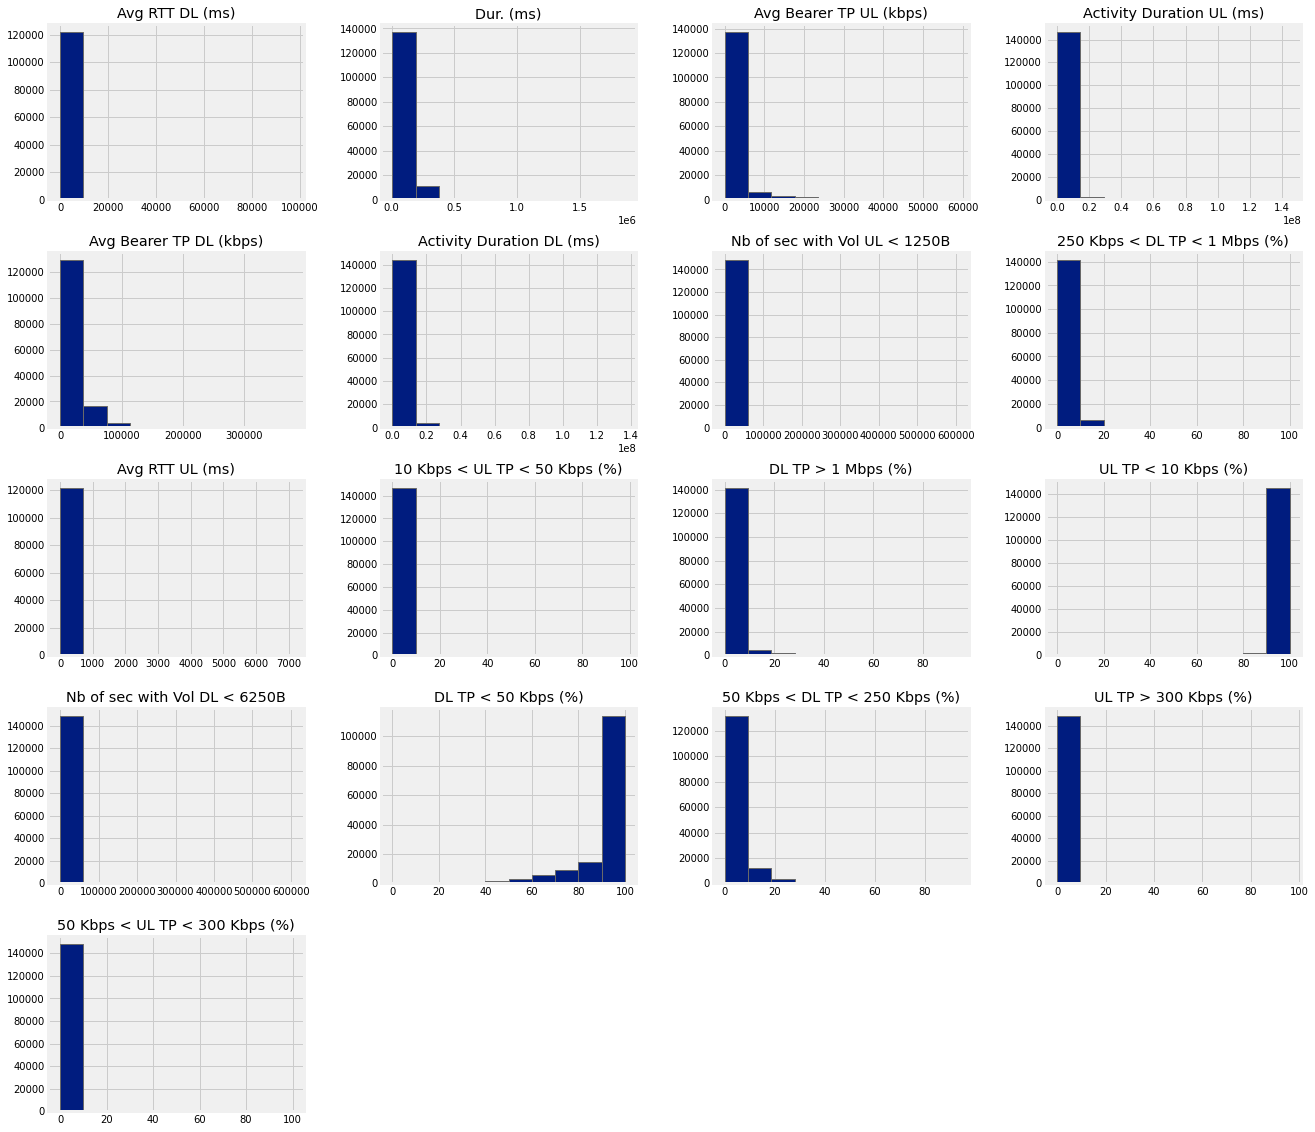

In [177]:
#Distribution of numeric variables
_=df[cols_hist].hist(figsize=(20,20))

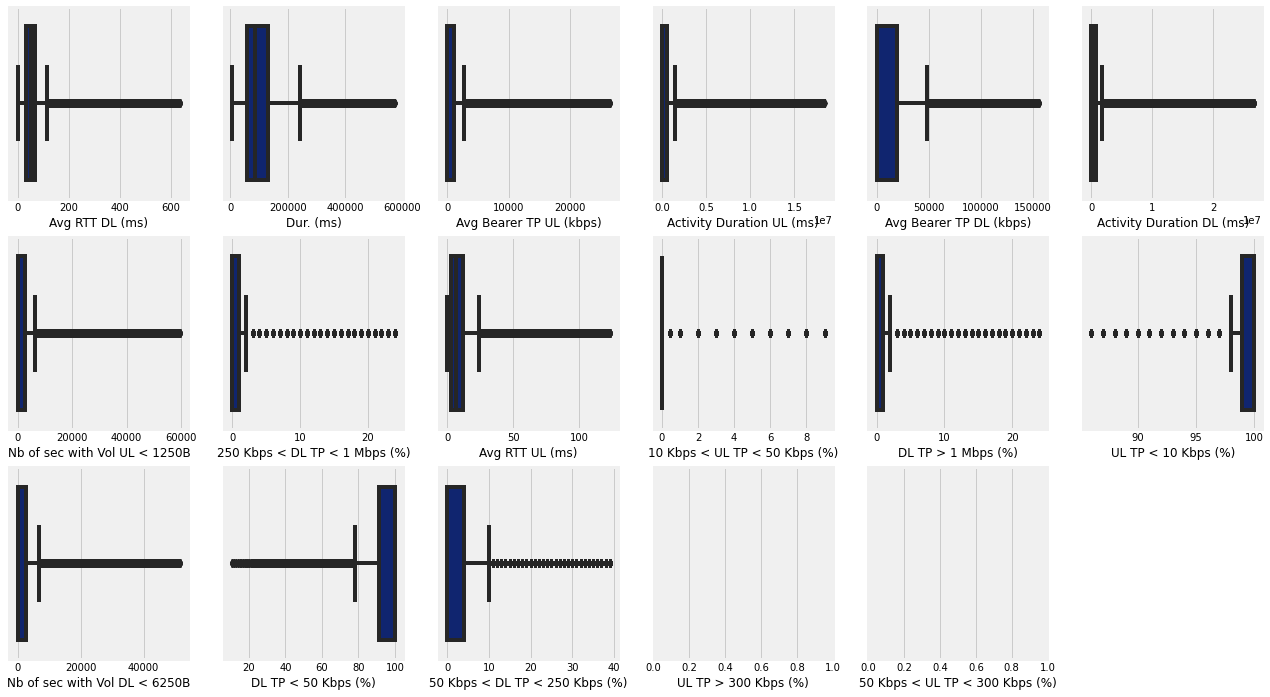

In [185]:
fig, axs = plt.subplots(3, 6,figsize=(20,12))
axe = axs.ravel()
for i, var in enumerate(cols_hist):
    sns.boxplot(x=var,data=df,ax=axe[i])
    
gl = len(cols_hist)
for i in range(18 - gl):
    fig.delaxes(ax=axe[gl + i])

In [179]:
df=outlier_remove(df)

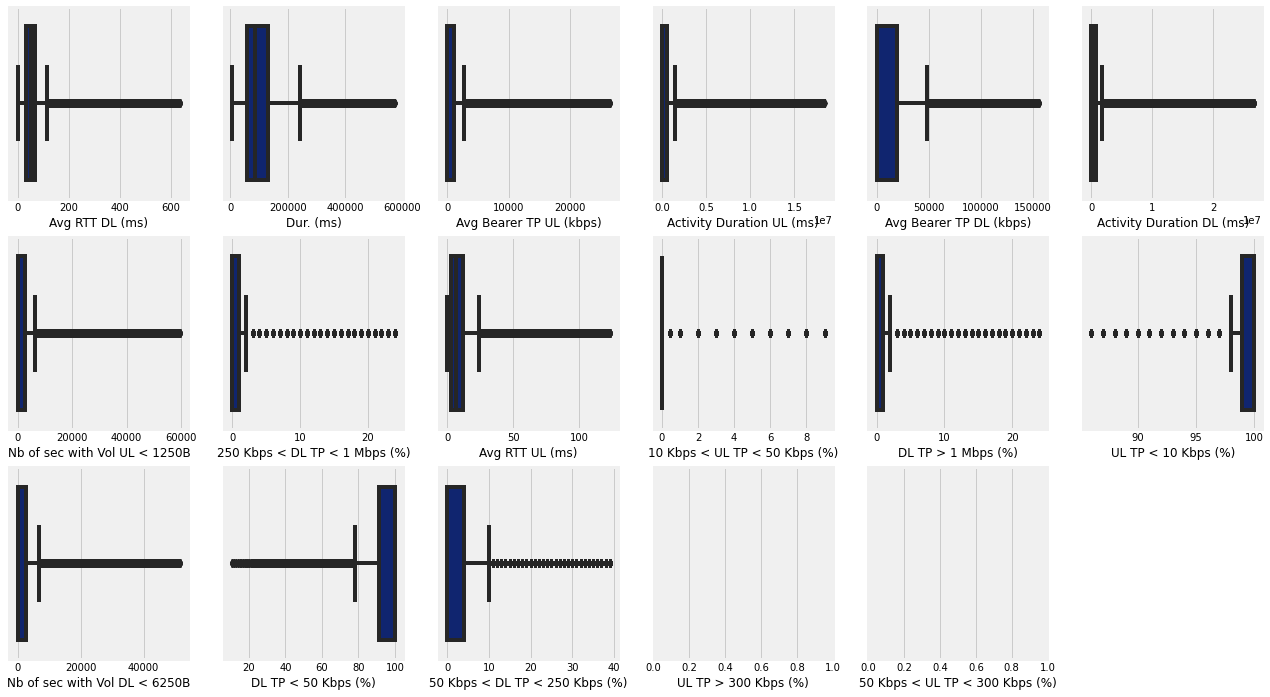

In [184]:
fig, axs = plt.subplots(3, 6,figsize=(20,12))
axe = axs.ravel()
for i, var in enumerate(cols_hist):
    sns.boxplot(x=var,data=df,ax=axe[i])
    
gl = len(cols_hist)
for i in range(18 - gl):
    fig.delaxes(ax=axe[gl + i])

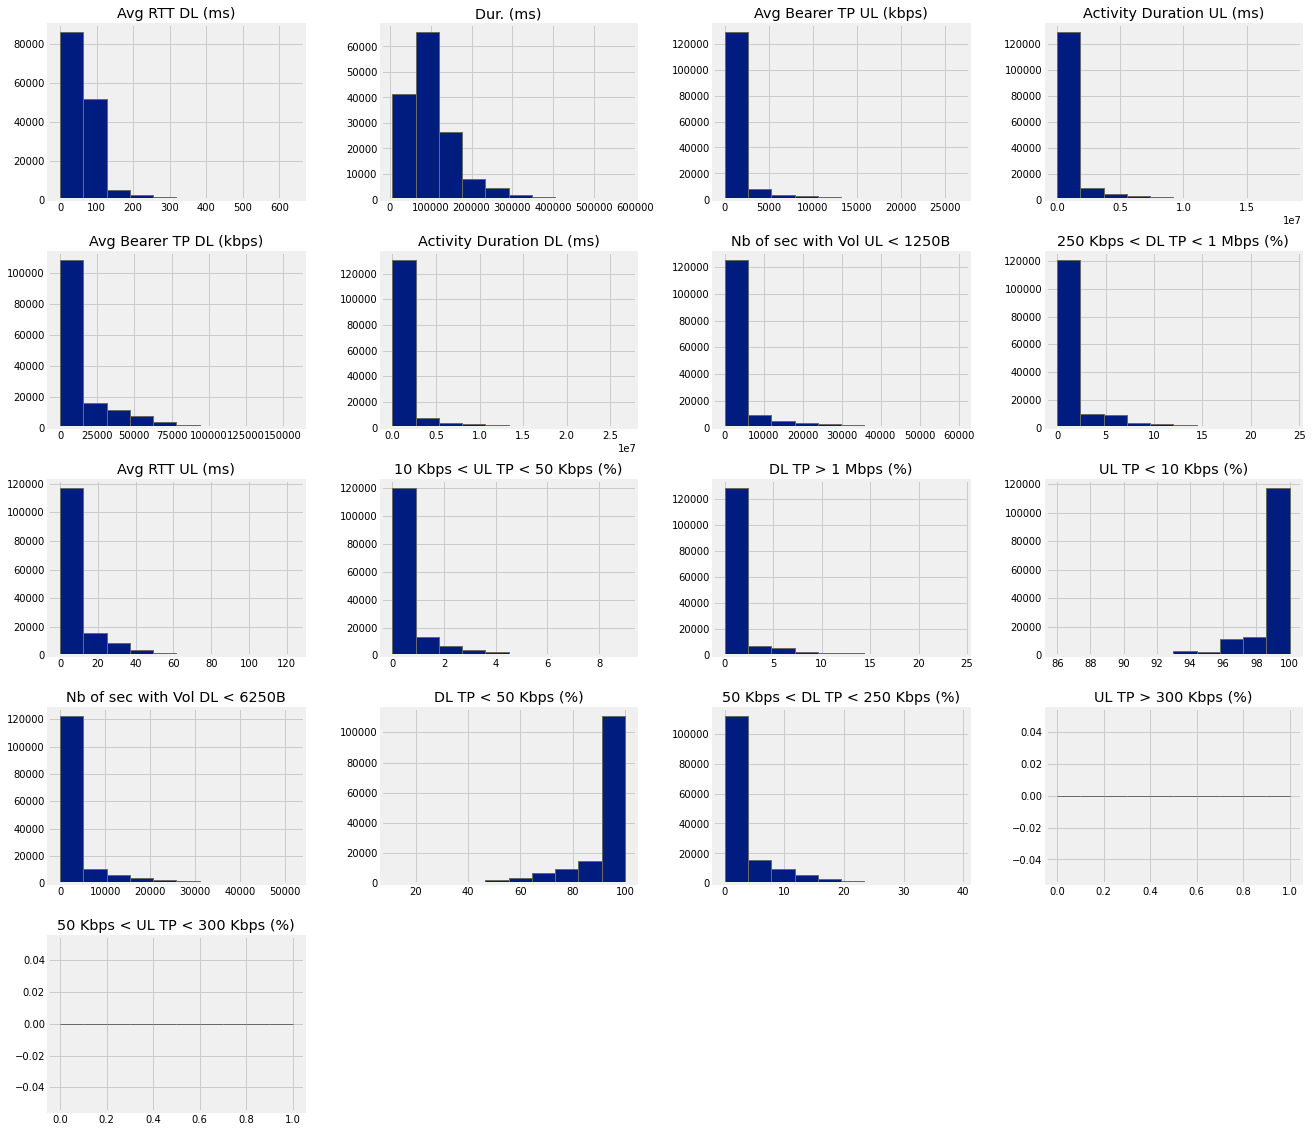

In [186]:
_=df[cols_hist].hist(figsize=(20,20))

In [187]:
# remove two columns that are dominantly zero
df.drop(['50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)'],axis=1,inplace=True)

In [188]:
cols_numeric.remove('UL TP > 300 Kbps (%)')
cols_numeric.remove('50 Kbps < UL TP < 300 Kbps (%)')

In [189]:
#Filling in missing values using mean value or median value depending on the previous histogram and skeweness
df=cleaning_df.fill_missing_values(cols_numeric,cols_cat)

In [190]:
df.isna().sum()

Bearer Id                         430
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (ms)                           0
IMSI                                0
MSISDN/Number                     496
IMEI                                2
Last Location Name                592
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Handset Manufacturer                0
Handset Type                        0
Nb of sec with Vol DL < 6250B       0
Nb of sec with Vol UL < 1250B       0
Social Media

In [191]:
# print('Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted ad <-1 skewed to negative')
# df.skew(axis=0,numeric_only=True)

**Drop Duplicates**

In [192]:
# Fix the string types and capitalize them 
df=cleaning_df.fix_data_types()

In [193]:
#Find total data volume for each application
df['Social Media Total (megabytes)'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Email Total (megabytes)'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Google Total (megabytes)'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Youtube Total (megabytes)'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix Total (megabytes)'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming Total (megabytes)'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other Total (megabytes)'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

#### Top 10 handsets used by the customers and  Top 3 handset manufacturers

In [194]:
plt.style.use('seaborn-dark-palette')

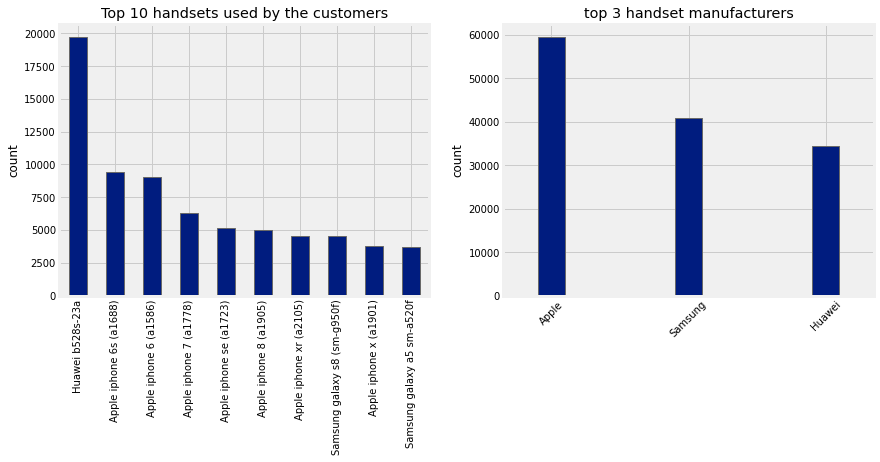

In [195]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
_ = df.query('`Handset Type`!="Undefined"')['Handset Type'].value_counts()[:10].plot(kind='bar', ylabel='count', rot=90,
                                                                                     ax=axs[0],
                                                                                     title='Top 10 handsets used by '
                                                                                           'the customers')
_ = df.query('`Handset Manufacturer`!="Undefined"')['Handset Manufacturer'].value_counts()[:3].plot(kind='bar',ylabel='count',rot=45,width=0.2,
                                                                            ax=axs[1],title='top 3 handset manufacturers')

#### top 5 handsets per top 3 handset manufacturer

In [196]:
df_manfact_goup=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung"\
                           or `Handset Manufacturer`=="Huawei"')

In [197]:
df_manfact_goup=df_manfact_goup.groupby(['Handset Manufacturer','Handset Type']).aggregate({'Handset Type':'count'})
pd.DataFrame(df_manfact_goup['Handset Type'].groupby('Handset Manufacturer',group_keys=False).nlargest(5))

Handset Type
Handset Manufacturer Handset Type                                
Apple                Apple iphone 6s (a1688)                 9419
                     Apple iphone 6 (a1586)                  9023
                     Apple iphone 7 (a1778)                  6326
                     Apple iphone se (a1723)                 5187
                     Apple iphone 8 (a1905)                  4993
Huawei               Huawei b528s-23a                       19752
                     Huawei e5180                            2079
                     Huawei p20 lite huawei nova 3e          2021
                     Huawei p20                              1480
                     Huawei y6 2018                           997
Samsung              Samsung galaxy s8 (sm-g950f)            4520
                     Samsung galaxy a5 sm-a520f              3724
                     Samsung galaxy j5 (sm-j530)             3696
                     Samsung galaxy j3 (sm-j330)             3484
                     Samsung galaxy s7 (sm-g930x)            3199

In [135]:
df_grouped_bytesdata = df.groupby('IMSI').aggregate({'Bearer Id': 'count', 'Total UL (Bytes)': 'sum',
                                                     'Dur. (ms)': 'sum', 'Total DL (Bytes)': 'sum',
                                                     'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum',
                                                     'Google DL (Bytes)': 'sum', 'Google UL (Bytes)': 'sum',
                                                     'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum',
                                                     'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)': 'sum',
                                                     'Other DL (Bytes)': 'sum', 'Other UL (Bytes)': 'sum',
                                                     'Social Media Total (megabytes)': 'sum',
                                                     'Email Total (megabytes)': 'sum',
                                                     'Google Total (megabytes)': 'sum',
                                                     'Youtube Total (megabytes)': 'sum',
                                                     'Netflix Total (megabytes)': 'sum',
                                                     'Gaming Total (megabytes)': 'sum',
                                                     'Other Total (megabytes)': 'sum',
                                                     'MSISDN/Number': 'nunique', 'IMEI': 'nunique',
                                                     'Handset Manufacturer': 'unique'}).sort_values(by='Bearer Id',
                                                                                                    ascending=False)

df_grouped_bytesdata['Handset Manufacturer'] = df_grouped_bytesdata['Handset Manufacturer'].apply(lambda x: x[0])
df_grouped_bytesdata

,Bearer Id,Total UL (Bytes),Dur. (ms),Total DL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),...,Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes),MSISDN/Number,IMEI,Handset Manufacturer
IMSI,,,,,,,,,,,,,,,,,,,,,
208201402778052,18,669.650721,4.313402e+06,7301.516540,164.048706,210.434341,116.106455,36.085397,199.479238,129.246502,...,43.374779,42.418782,152.191852,374.483047,328.725740,6887.572116,8167.877776,1,1,Samsung
208201715944176,17,689.483001,3.277631e+06,8156.743493,199.823443,194.546775,93.941708,34.032079,179.585986,181.815060,...,28.294544,40.788634,127.973787,394.370218,361.401046,7749.432234,7639.263572,1,1,Samsung
208201007176097,17,729.577380,2.717417e+06,7770.043342,237.883033,215.075736,107.904739,34.403176,193.912238,163.068369,...,27.135500,40.633966,142.307915,452.958769,356.980607,7326.673487,6354.583086,1,1,Samsung
208201906760163,16,624.260321,4.035428e+06,7081.602462,119.658146,138.332942,90.958549,25.557796,196.277206,203.241873,...,35.412358,35.999792,116.516345,257.991088,399.519079,6725.559211,6317.415487,1,1,Huawei
208202100881019,15,703.478581,2.763304e+06,7811.295382,194.068298,202.220900,88.626532,34.596567,146.500839,188.142430,...,39.783189,33.693767,123.223099,396.289198,334.643269,7461.045228,4716.134493,1,1,Samsung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208201545190143,0,45.142931,5.033600e+04,587.378322,15.024089,5.458119,4.058175,2.008655,15.959307,21.857833,...,2.169271,0.434863,6.066830,20.482208,37.817140,560.549078,104.617802,1,1,Apple
208201907837163,0,20.015468,2.265000e+04,32.929145,11.353620,5.723417,9.854281,3.637444,5.567228,8.027681,...,0.927680,1.076584,13.491725,17.077037,13.594909,5.704169,397.310544,1,1,Samsung
208200802533205,0,24.241141,1.334400e+04,379.264125,3.628081,2.446340,0.234166,2.293746,19.747414,10.634569,...,3.122763,1.807371,2.527912,6.074421,30.381983,355.381070,32.903924,1,1,Samsung


In [86]:
df_grouped_bytesdata.describe()

,Bearer Id,Total UL (Bytes),Dur. (ms),Total DL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),MSISDN/Number,IMEI
count,107265.000000,107265.000000,1.072650e+05,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000
mean,1.389092,57.284993,1.427436e+05,633.370609,16.205389,15.337623,8.012076,2.864882,16.196397,15.325393,587.959879,11.548059,586.690395,11.512034,0.996187,1.000047
std,0.809545,35.642660,1.479839e+05,464.372162,12.319253,11.593250,6.062659,2.172148,12.314313,11.606220,443.851520,8.729595,443.688125,8.703473,0.061783,0.009160
min,0.000000,2.866892,7.142000e+03,8.827082,0.000053,0.000106,0.000207,0.000003,0.000042,0.000035,0.002516,0.000059,0.003290,0.000156,0.000000,0.000000
25%,1.000000,36.392513,7.041100e+04,314.803069,7.641030,7.243533,3.799005,1.340855,7.585021,7.204045,279.237002,5.443850,276.658777,5.459190,1.000000,1.000000
50%,1.000000,46.780498,1.024500e+05,570.062811,14.595242,13.865169,7.253591,2.592477,14.630597,13.874520,532.202932,10.441812,529.661032,10.373834,1.000000,1.000000
75%,2.000000,65.658420,1.727990e+05,807.067303,21.119127,19.970034,10.428191,3.742908,21.125936,20.005364,766.715575,15.076961,765.070420,15.022813,1.000000,1.000000
max,18.000000,729.577380,4.313402e+06,8156.743493,237.883033,215.075736,116.106455,36.085397,199.479238,203.241873,7622.035401,154.789688,8025.476831,152.930478,2.000000,2.000000


In [199]:
df_manfact=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung" \
                    or `Handset Manufacturer`=="Huawei"')

In [209]:
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

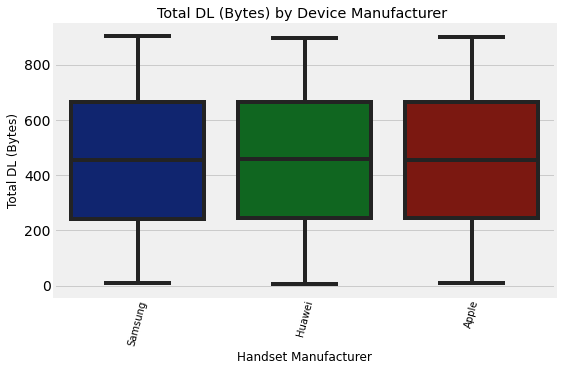

In [208]:
plot_box_multi(df_manfact,x_col="Handset Manufacturer",
               y_col="Total DL (Bytes)",title="Total DL (Bytes) by Device Manufacturer ")

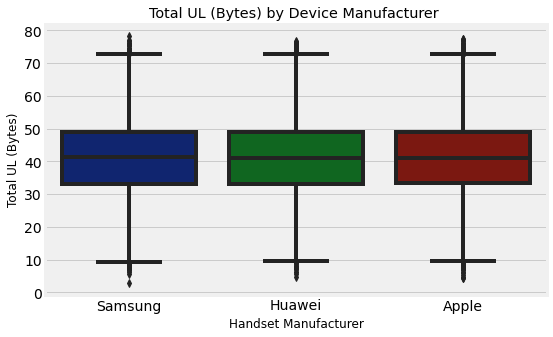

In [210]:
plot_box_multi(df_manfact,x_col="Handset Manufacturer",
               y_col="Total UL (Bytes)",title="Total UL (Bytes) by Device Manufacturer ")

In [261]:
apps_usage=df.aggregate({'Social Media Total (megabytes)': ['sum', 'mean', 'median'],
              'Email Total (megabytes)': ['sum', 'mean', 'median'],
              'Google Total (megabytes)': ['sum', 'mean', 'median'],
              'Youtube Total (megabytes)': ['sum', 'mean', 'median'],
              'Netflix Total (megabytes)': ['sum', 'mean', 'median'],
              'Gaming Total (megabytes)': ['sum', 'mean', 'median'],
              'Other Total (megabytes)': ['sum', 'mean', 'median']})

In [262]:
apps_usage

,Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes)
sum,273186.115640,337566.857621,1.166717e+06,3.383461e+06,3.381185e+06,6.430622e+07,6.416618e+07
mean,1.828176,2.259015,7.807730e+00,2.264230e+01,2.262706e+01,4.303406e+02,4.294034e+02
median,1.826039,2.263367,7.813749e+00,2.266186e+01,2.263334e+01,4.316332e+02,4.300434e+02


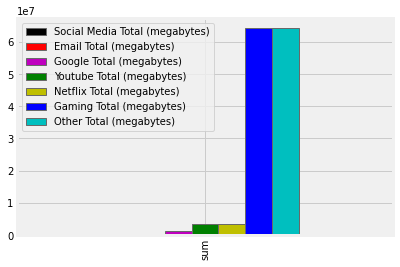

In [263]:
_=apps_usage.loc[['sum']].plot(kind='bar',color=['k','r','m','g','y','b','c'])

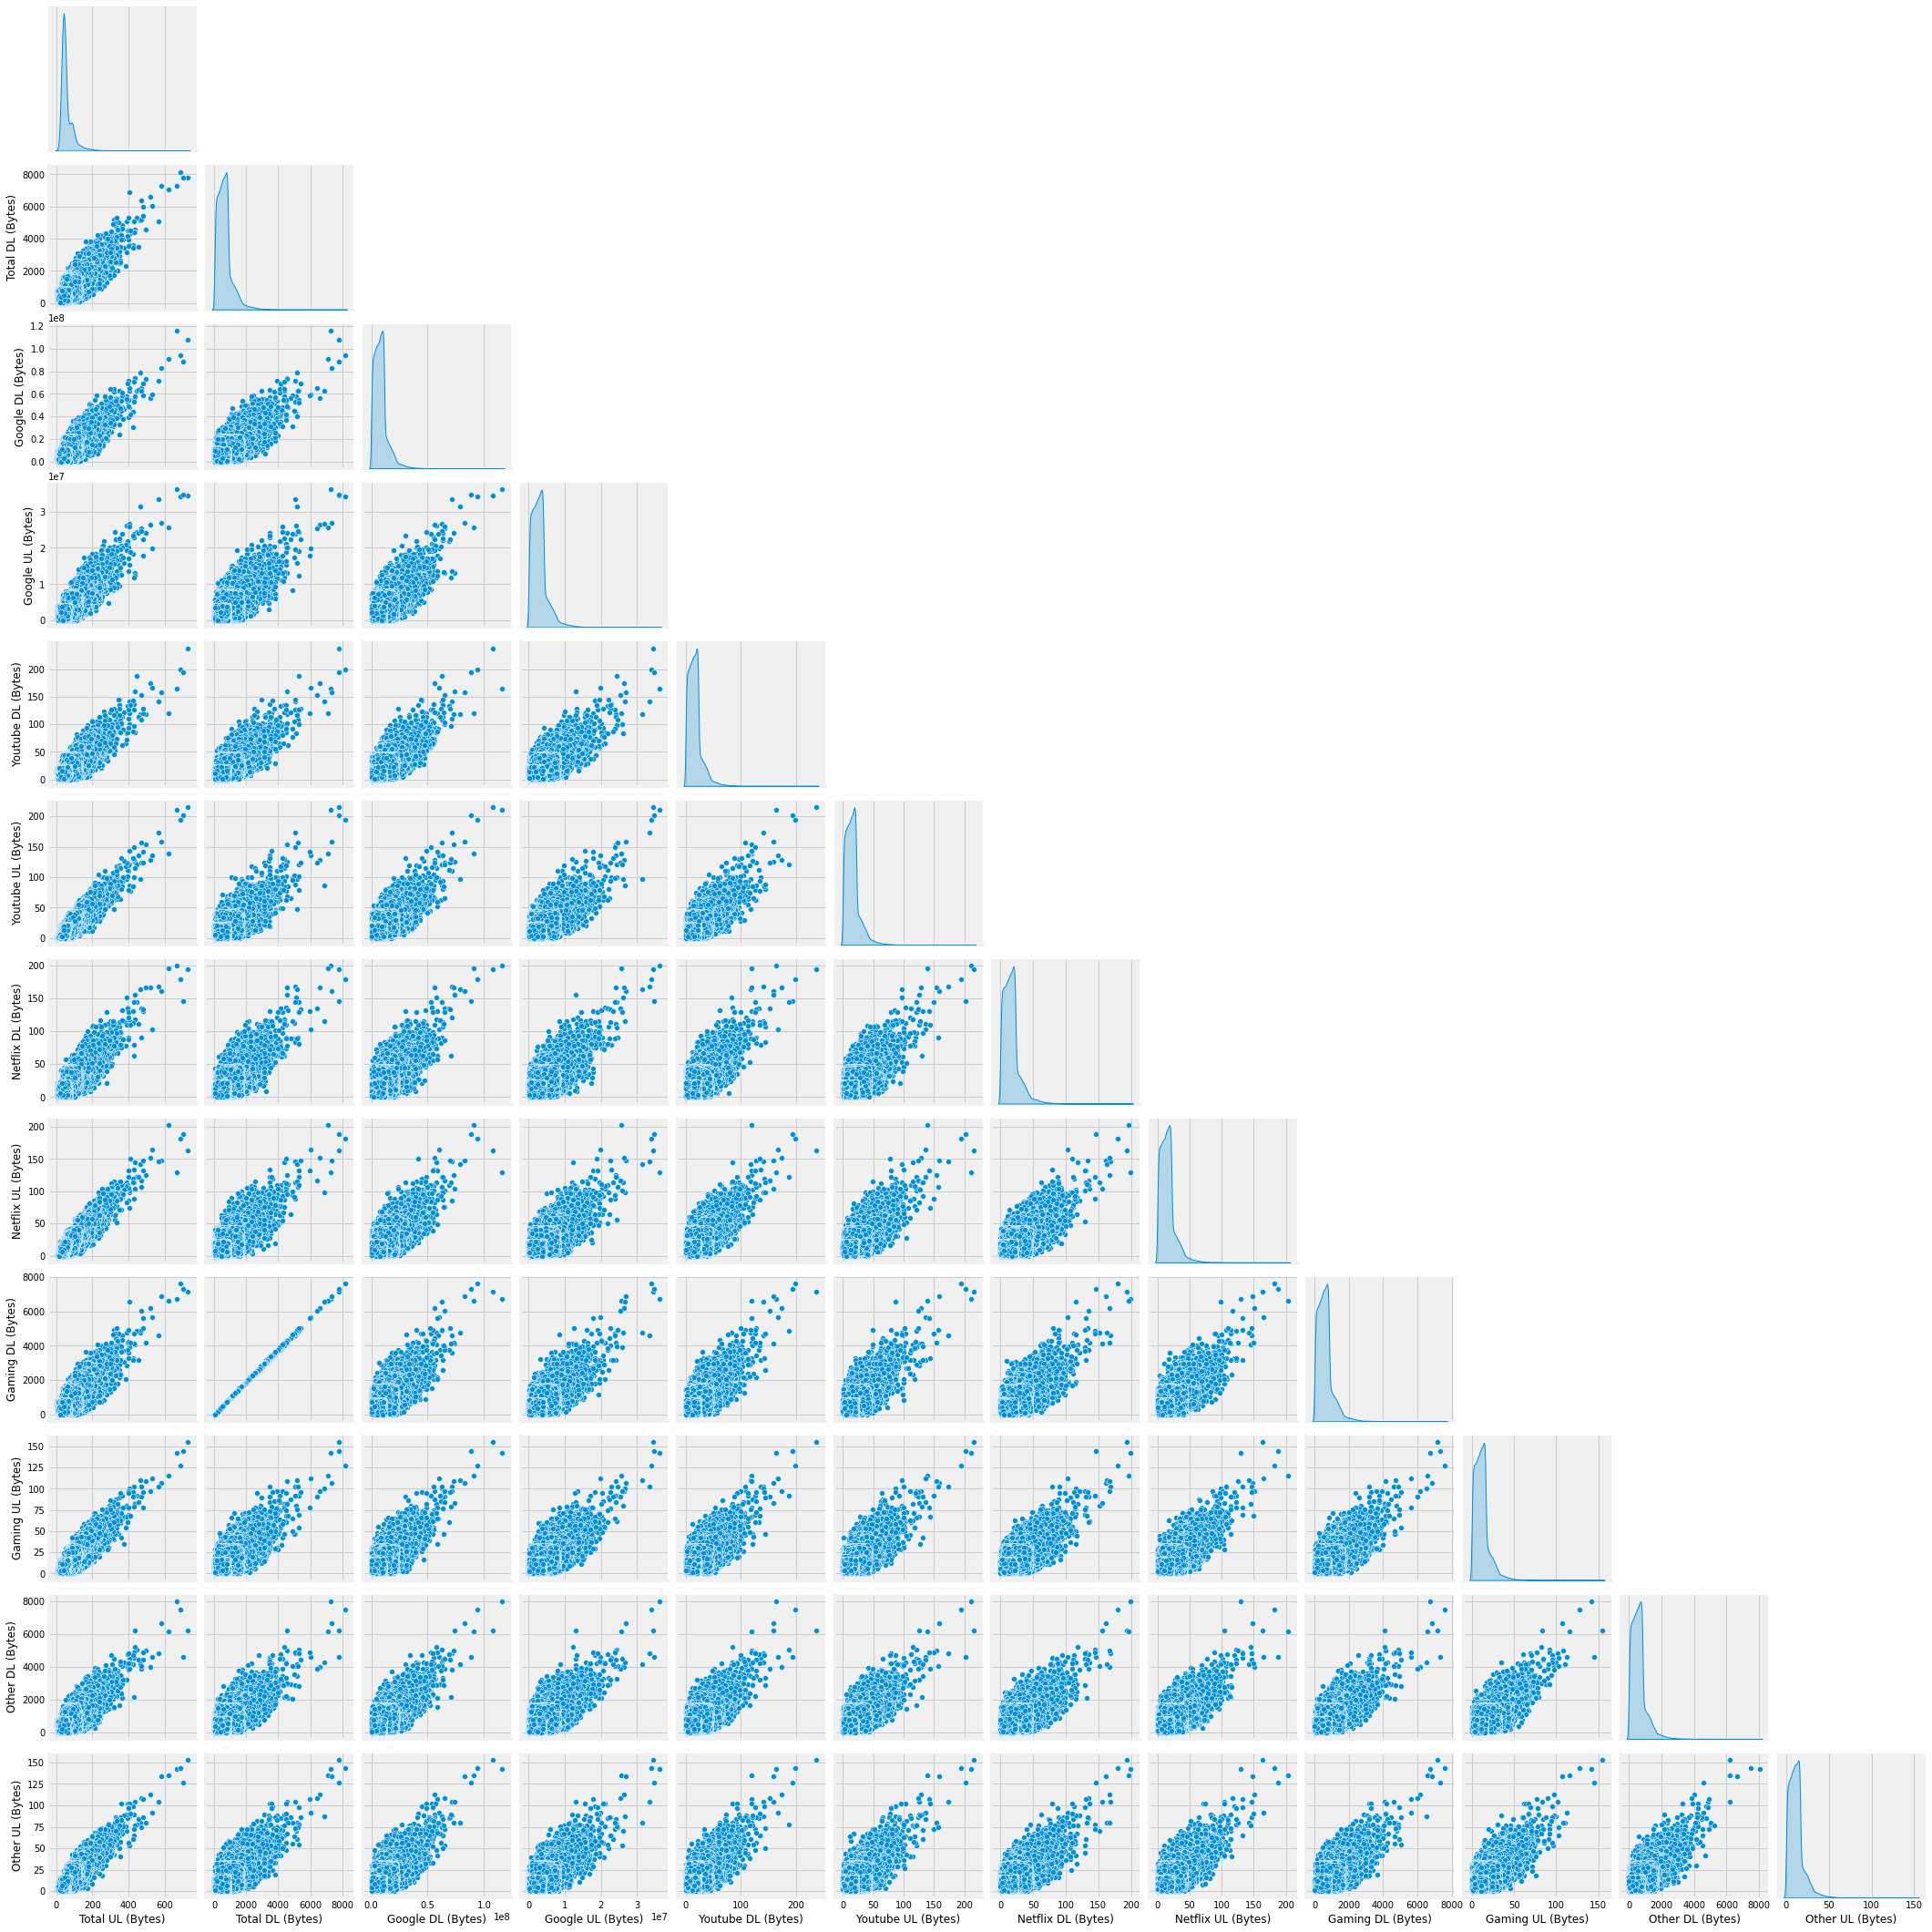

In [209]:
_=sns.pairplot(df_grouped_bytesdata[bytes_data],diag_kind='kde',markers=['s'],corner=True)

In [136]:
# bytes_initials=['Total','Social Media','Email','Google','Youtube','Netflix','Gaming','Other'
'Social Media Total (megabytes)':['sum', 'mean', 'median']
'Email Total (megabytes)':['sum', 'mean', 'median']
'Google Total (megabytes)':['sum', 'mean', 'median']
'Youtube Total (megabytes)':['sum', 'mean', 'median']
'Netflix Total (megabytes)':['sum', 'mean', 'median']
'Gaming Total (megabytes)':['sum', 'mean', 'median']
'Other Total (megabytes)':['sum', 'mean', 'median']